In [85]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [50]:
df = pd.read_csv('data1.csv')
df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


# Разминка 1

In [86]:
time = df.iloc[:, 1].values.tolist()
longitude = df.iloc[:, 2].values.tolist()
latitude = df.iloc[:, 3].values.tolist()

time = [x[12:] for x in time]

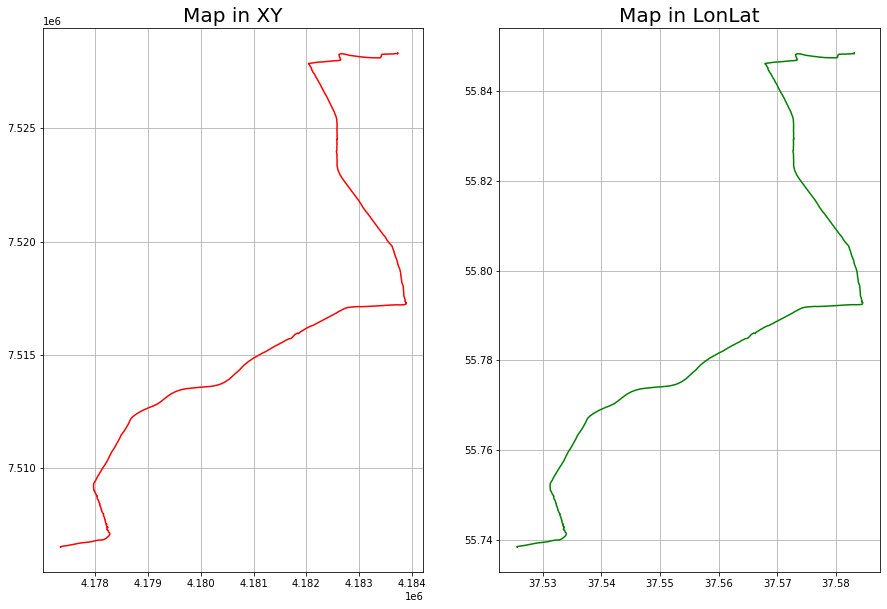

In [52]:
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

cy = []
cx = []
R = 6378137  # Radius of earth in M

for i in range(len(longitude)):
    cy.append(math.log(math.tan(math.pi / 4 + math.radians(latitude[i]) / 2)) * R)
    cx.append(math.radians(longitude[i]) * R)
        
plt.subplot(121)
plt.plot(cx,cy,'r')
plt.title('Map in XY', fontsize=20)
plt.grid()

plt.subplot(122)
plt.plot(longitude,latitude,'g')
plt.title('Map in LonLat', fontsize=20)
plt.grid()

In [53]:
import folium

mymap = folium.Map(location=[latitude[0], longitude[0]], zoom_start=15)
folium.Marker([latitude[0], longitude[0]], popup = 'START').add_to(mymap) 
folium.Marker([latitude[-1], longitude[-1]], popup = 'FINISH').add_to(mymap) 
folium.PolyLine(list(zip(latitude[::10], longitude[::10])), color="red").add_to(mymap)

mymap

# Разминка 2

In [91]:
time_OBD = df.iloc[:, 1].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()
speed_GPS = df.iloc[:, 16].values.tolist()

In [92]:
time_GPS = [x[11:19] for x in time_GPS]
time_OBD = [x[12:] for x in time_OBD]

In [93]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]

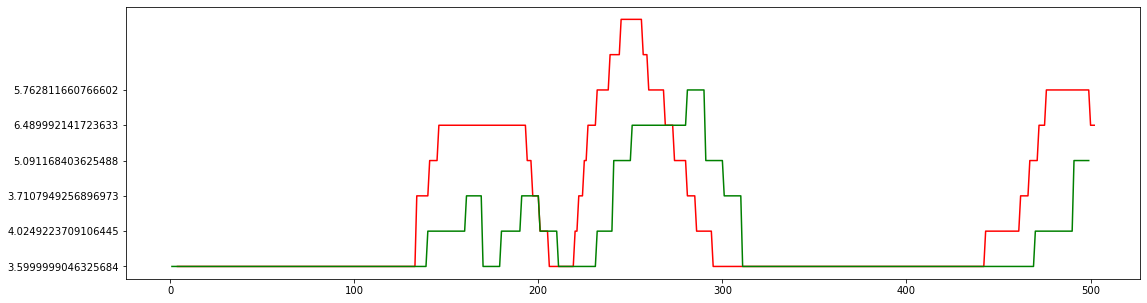

In [94]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(time_OBD))][4:503], speed_OBD[4:503],'r')
plt.plot([i for i in range(len(time_GPS))][1:500], speed_GPS[1:500],'g')

In [58]:
scaler = MinMaxScaler()

In [59]:
speed_OBD_1 = np.array([scaler.fit_transform(np.expand_dims(speed_OBD,axis = 1))])
speed_GPS_1 = np.array([scaler.fit_transform(np.expand_dims(speed_GPS,axis = 1))])

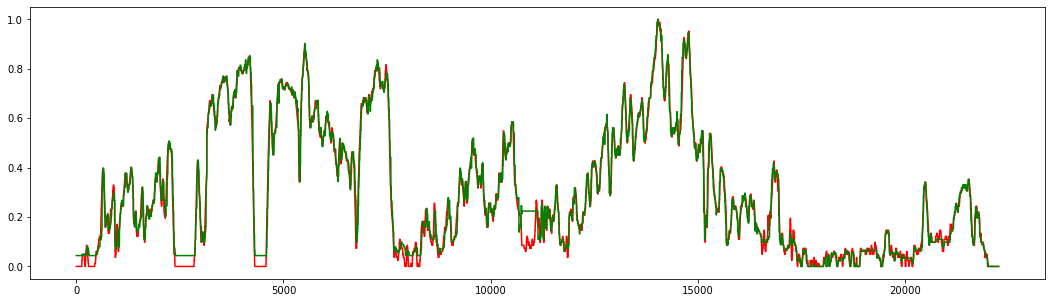

In [60]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(speed_GPS))], speed_OBD_1[0,:22261:,0],'r')
plt.plot([i for i in range(len(speed_GPS))], speed_GPS_1[0,::,0],'g')

# Разминка 3

In [61]:
time_GPS = df.iloc[:, 0].values.tolist()
speed_GPS = df.iloc[:, 16].values.tolist()
bearing = df.iloc[:, 7].values.tolist()

In [62]:
time_GPS = [x[11:19] for x in time_GPS]

In [63]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]

Text(0.5, 1.0, 'Bearing(t)')

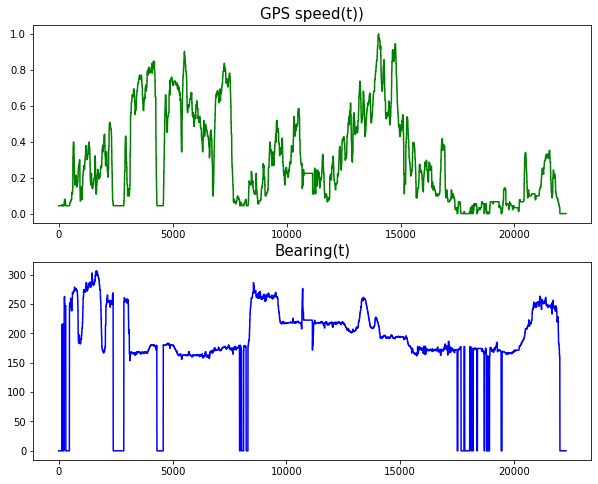

In [64]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

plt.subplot(211)
plt.plot([i for i in range(len(speed_GPS))], speed_GPS_1[0,::,0],'g')
plt.title('GPS speed(t))',fontsize=15)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS))],bearing,'b')
plt.title('Bearing(t)', fontsize=15)

In [65]:
velx = []
vely = []
for i in range(len(speed_GPS)):
    V = float(speed_GPS[i])
    Vx = V*math.cos(bearing[i])
    Vy = V*math.sin(bearing[i])
    velx.append(Vx)
    vely.append(Vy)


Text(0.5, 1.0, 'Velocity_y(t))')

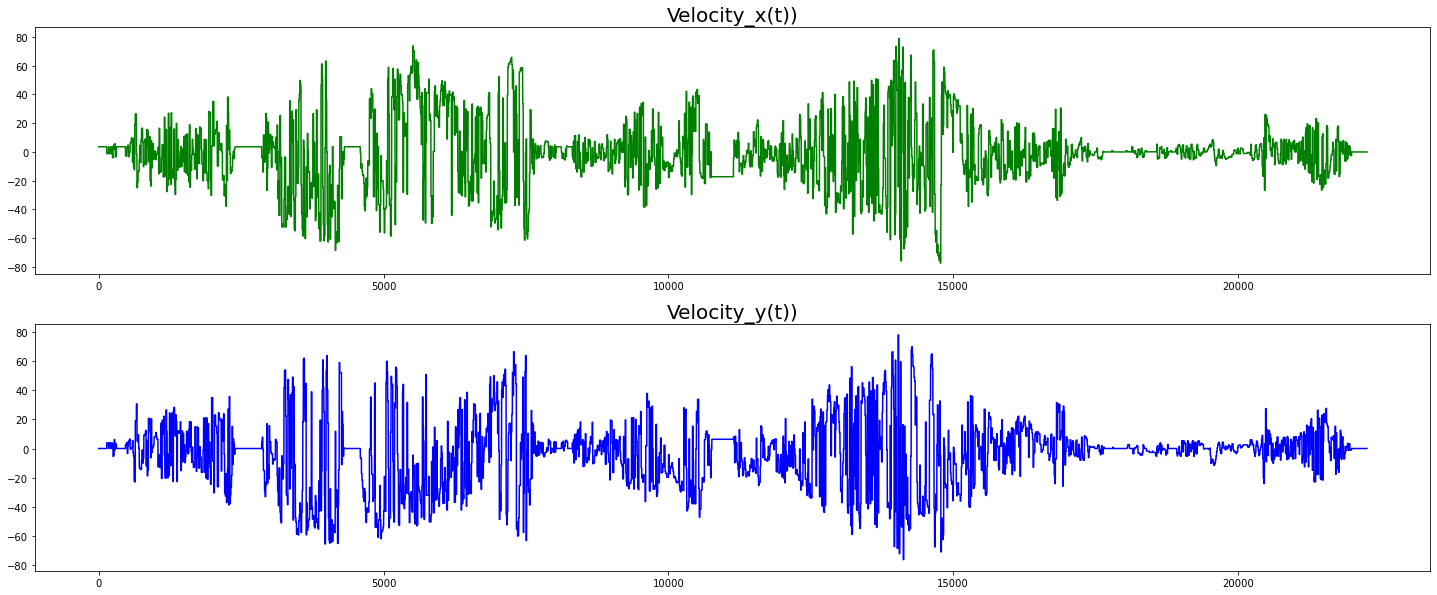

In [66]:
#глабольно вообще ничего не дает, 
#но вероятно если умножать скорость на время, то можно получить карту, если строить v(t) напрвленно

f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(time_GPS[:22261]))], velx,'g')
plt.title('Velocity_x(t))',fontsize=20)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS[:22261]))],vely,'b')
plt.title('Velocity_y(t))',fontsize=20)

# Задание 1

In [123]:
speed_GPS = df.iloc[:, 16].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_OBD = df.iloc[:, 1].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()

In [124]:
time_GPS = [x[11:19] for x in time_GPS]

In [125]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]
speed_OBD = [str(x) for x in speed_OBD if isinstance(x, (int, float)) or (isinstance(x, str) and all(c.isdigit() or c == '.' for c in x))]

In [126]:
speed_GPS = [float(x) for x in speed_GPS]
speed_OBD = [float(x) for x in speed_OBD]

# Фильтр Калмана

In [148]:
def predict(mu1, var1, mu2, var2):
    var = var1 + var2
    mu = mu1 + mu2
    return mu, var

def update(mu1,var1,mu2,var2):
    k=var1/(var1+var2)
    var = k*var2
    mu = mu1*(1-k) + mu2*k
    
    return mu, var

def printg(t1,t,t2,time_GPS,correction,speed_GPS,speed_OBD):
    f=plt.figure()
    f.set_figwidth(20)
    f.set_figheight(5)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], correction[t1//t2:t//t2:], label='kalman', c='b',linewidth = 5)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_OBD[t1:t:t2], label='OBD', c='r', linewidth = 3)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_GPS[t1:t:t2], label='GPS', c='g', linewidth = 3)
    plt.legend(fontsize = 18)

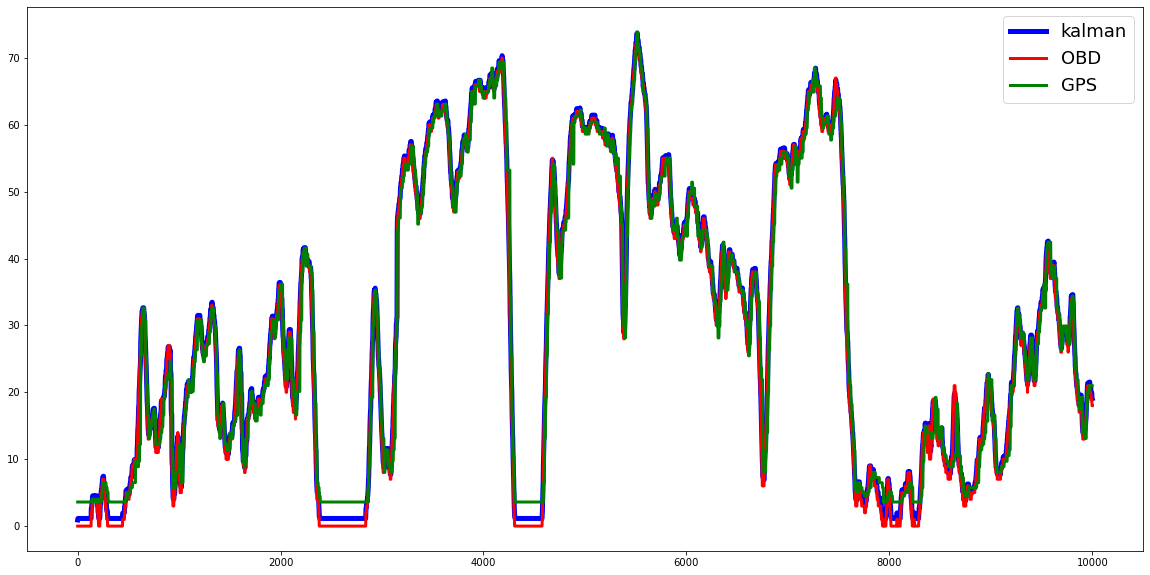

In [132]:
correction =[]

mu, sigma = 0, 80.

ksi_GPS = 10
ksi_OBD = 2

v=1
v_sigma = 2
    
t2 = 1
for t in range(1,len(speed_GPS),t2):
    
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS, meas_OBD = speed_GPS[t-1], speed_OBD[t-1] 
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)

printg(1,10000,t2,time_GPS,correction,speed_GPS,speed_OBD)

# Фильтр Калмана при пропадании данных с GPS

In [141]:
speed_GPS = df.iloc[:, 16].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_OBD = df.iloc[:, 1].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()

In [142]:
time_GPS = [x[11:19] for x in time_GPS]

In [143]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]
speed_OBD = [str(x) for x in speed_OBD if isinstance(x, (int, float)) or (isinstance(x, str) and all(c.isdigit() or c == '.' for c in x))]

In [144]:
speed_GPS = [float(x) for x in speed_GPS]
speed_OBD = [float(x) for x in speed_OBD]

In [145]:
start_time = "17:25:00"
end_time = "17:35:00"

first_index = time_GPS.index(start_time)

last_index = len(time_GPS) - 1 - time_GPS[::-1].index(end_time)

speed_GPS[first_index:last_index] = [0] * (last_index - first_index)

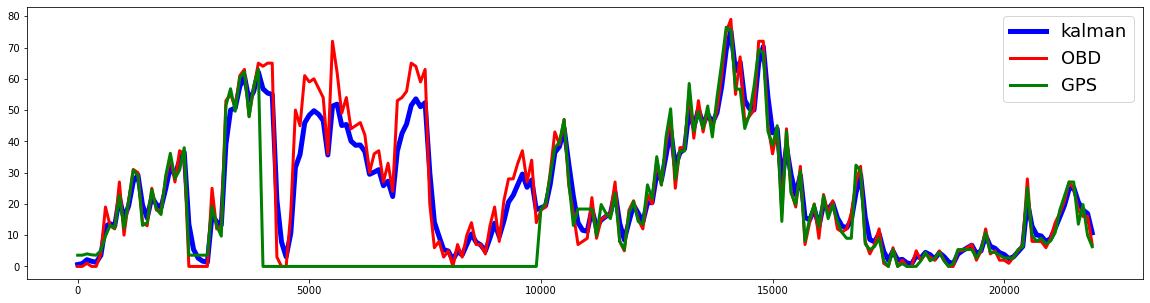

In [149]:
correction =[]

mu, sigma = 0, 80.

ksi_GPS = 10
ksi_OBD = 2

v=1
v_sigma = 2
    
t2 = 100
for t in range(1,len(speed_GPS),t2):

    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = 0 if speed_GPS[t-1] == 0. else speed_GPS[t-1]
    meas_OBD = speed_OBD[t-1]
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)

printg(1,22000,t2,time_GPS,correction,speed_GPS,speed_OBD)


# Фильтр Калмана при пропадании данных с OBD

In [150]:
speed_GPS = df.iloc[:, 16].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_OBD = df.iloc[:, 1].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()

In [151]:
time_GPS = [x[11:19] for x in time_GPS]
time_OBD = [x[12:20] for x in time_OBD]

In [152]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]
speed_OBD = [str(x) for x in speed_OBD if isinstance(x, (int, float)) or (isinstance(x, str) and all(c.isdigit() or c == '.' for c in x))]

In [153]:
speed_GPS = [float(x) for x in speed_GPS]
speed_OBD = [float(x) for x in speed_OBD]

In [154]:
start_time = "17:40:00"
end_time = "17:50:00"

first_index = time_OBD.index(start_time)

last_index = len(time_OBD) - 1 - time_OBD[::-1].index(end_time)

speed_OBD[first_index:last_index] = [0] * (last_index - first_index)

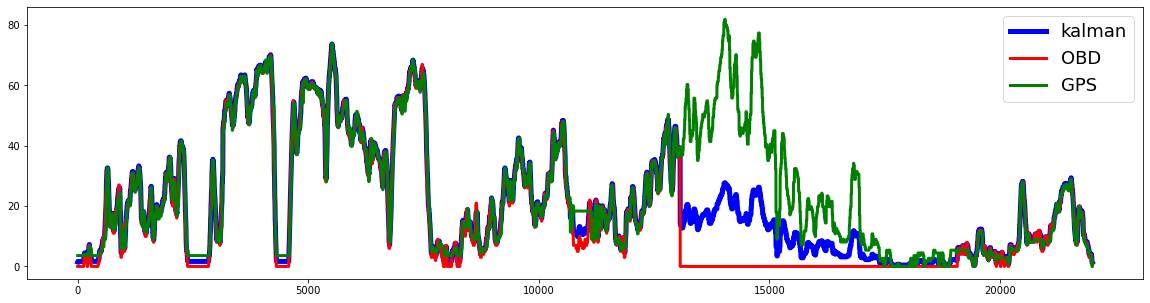

In [156]:
correction =[]

mu, sigma = 0, 80.
 
ksi_GPS = 4.
ksi_OBD = 2.

t2 = 1
for t in range(1,len(speed_GPS),t2):
    
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = speed_GPS[t-1]
    meas_OBD = 0 if speed_OBD[t-1] == 0. else speed_OBD[t-1]
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)
    
printg(1,22000,t2,time_GPS,correction,speed_GPS,speed_OBD)

# Задание 2

In [157]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
import random

In [158]:
df = pd.read_csv('data1.csv')
filtered_df = df.drop_duplicates(subset = ['GPS Time'])
filtered_df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
11,Fri Mar 25 17:18:17 GMT+03:00 2016,25-Mar-2016 17:18:09.767,37.583097,55.848561,1.0,12.0,143.0,0.0,-2.438110,9.399414,3.293228,-0.010937,1190.75,0.0,-0.010937,-,3.5999999046325684,0.093418
21,Fri Mar 25 17:18:18 GMT+03:00 2016,25-Mar-2016 17:18:10.767,37.583096,55.848555,1.0,11.0,144.0,0.0,0.038483,9.431992,-3.371109,0.002961,1185.5,0.0,0.000313,-,3.5999999046325684,-0.060976
31,Fri Mar 25 17:18:19 GMT+03:00 2016,25-Mar-2016 17:18:11.767,37.583101,55.848559,1.0,11.0,145.0,0.0,0.337402,9.100815,0.512711,0.014257,1183.0,0.0,0.014257,-,3.5999999046325684,-0.030889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22231,Fri Mar 25 17:55:24 GMT+03:00 2016,25-Mar-2016 17:55:16.758,37.525678,55.738373,0.0,3.0,166.0,0.0,1.073486,9.429077,1.288727,0.006133,600.5,0.0,0.006133,-,0.0,0.031369
22241,Fri Mar 25 17:55:25 GMT+03:00 2016,25-Mar-2016 17:55:17.758,37.525678,55.738373,0.0,3.0,166.0,0.0,1.430130,9.228989,1.463638,0.006755,601.0,0.0,0.006755,-,0.0,0.049199
22251,Fri Mar 25 17:55:26 GMT+03:00 2016,25-Mar-2016 17:55:18.757,37.525679,55.738373,0.0,4.0,166.0,0.0,1.018509,9.644379,1.185532,0.007836,594.75,0.0,0.007836,-,0.0,0.020849
22261,Fri Mar 25 17:55:27 GMT+03:00 2016,25-Mar-2016 17:55:19.758,37.525679,55.738373,0.0,4.0,166.0,0.0,1.077225,9.629974,1.209213,0.014433,602.0,0.0,0.014433,-,0.0,0.023263


In [159]:
df[' Latitude'].unique()

array([55.84855829, 55.8485542 , 55.84856053, ..., 55.73837312,
       55.73837306, 55.73837302])

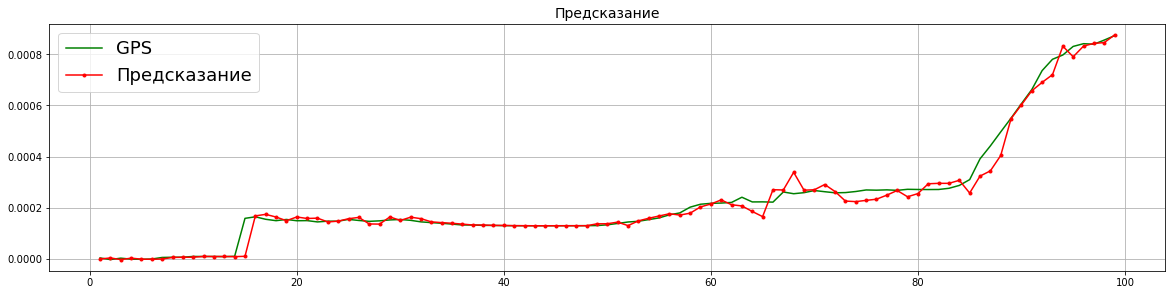

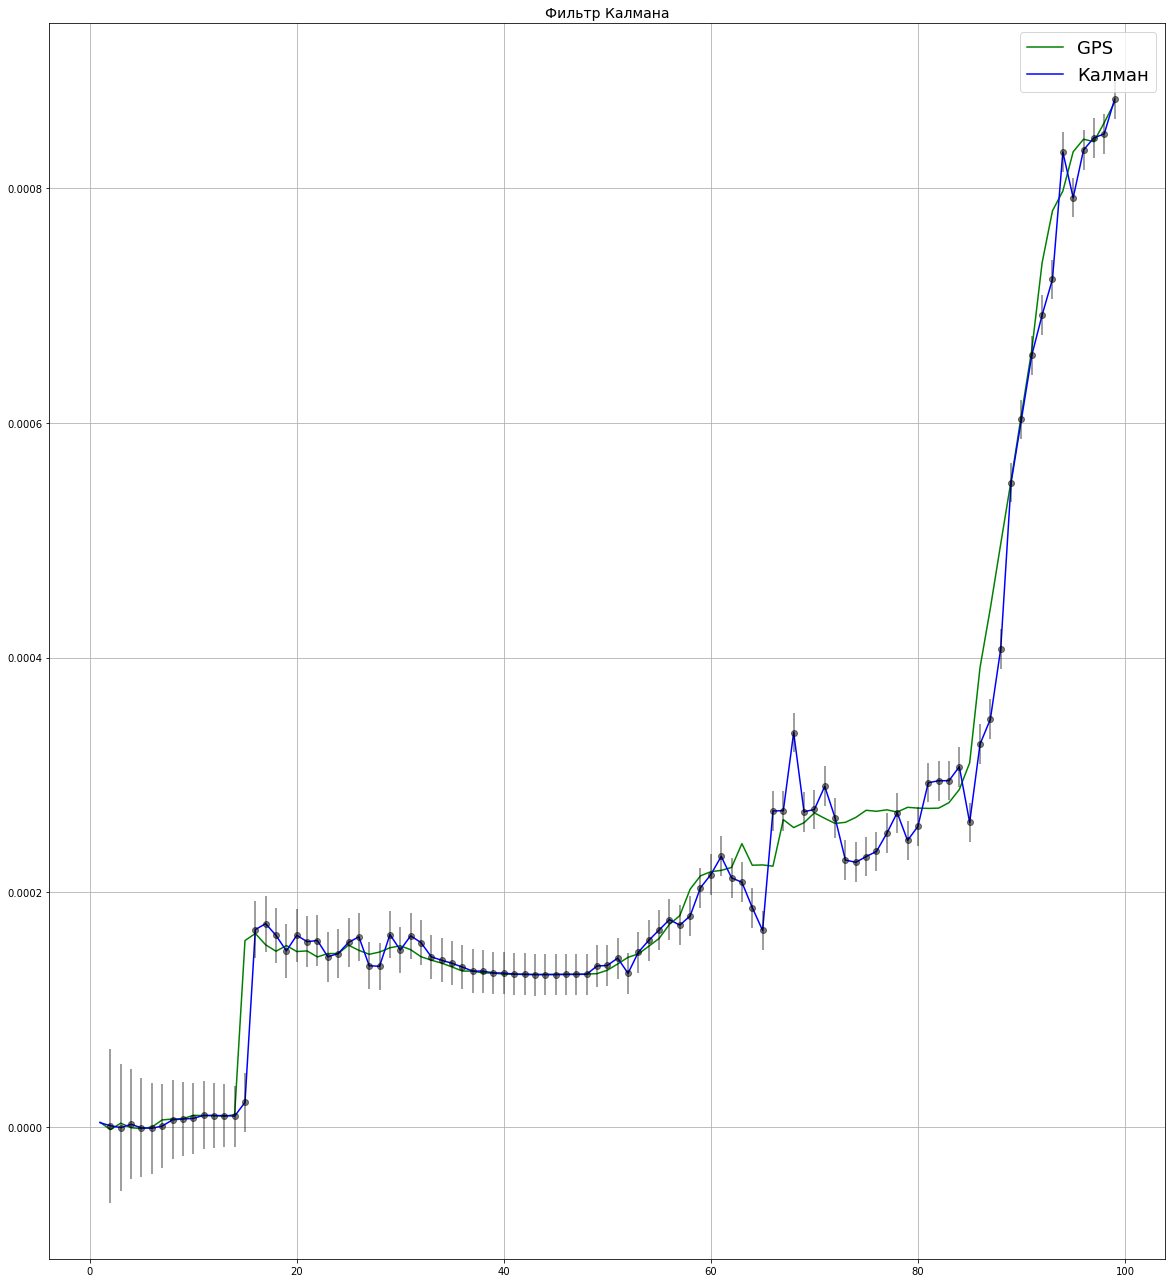

In [160]:
def predict(mu1, var1, mu2, var2):
    var = var1 + var2
    mu = mu1 + mu2
    return mu, var

def update(mu1, var1, mu2, var2):
    var = 1 / (1 / var1 + 1 / var2)
    mu = (mu1 * var2 + mu2 * var1) / (var1 + var2)
    return mu, var


# Данные:
speed = filtered_df['Speed (GPS)(km/h)'].values.tolist()
speed = [float(x)/3.6 if x != '-' else 0 for x in speed] # метры в секунду

bearing = filtered_df[' Bearing'].values.tolist()
bearing = [float(x) for x in bearing]

latitude = filtered_df[' Latitude'].values.tolist()
latitude = [float(latitude[0])-float(x) for x in latitude]

longitude = filtered_df[' Longitude'].values.tolist()
longitude = [float(x) for x in longitude]

time = filtered_df['GPS Time'].values.tolist()
time = [x[11:19] for x in time]
time_shift = 62295
time = [int(x[:2])*3600 + int(x[3:5])*60 + int(x[6:])-62295 for x in time] # перевод в секунды

calculation_cycle = len(filtered_df)

# Сигма предсказания:
motion_sigma = 1e-12
# Настройки датчика:
measurements_sigma = 1e-9


# Для перевода из метров в широту:
R = 6370786.15
degrees_per_meter = 1 / ((2 * 3.14159 / 360) * R)


sigma = 1e-8
pred = np.array([])
mu_var = np.array([])
variance = np.array([])

for t in range(1, calculation_cycle):
    
    motions = speed[t-1] * math.sin(bearing[t-1]) * degrees_per_meter
    mu, sigma = predict(latitude[t-1], sigma, motions, motion_sigma)
    pred = np.append(pred, mu)
    mu, sigma = update(mu, sigma, latitude[t], measurements_sigma)
    mu_var = np.append(mu_var, mu)
    variance = np.append(variance, sigma)

sigma3 = variance**0.5 * 3

f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
#i = 2192
i = 100
j = 1

# График предсказания:
plt.subplot(211)
plt.plot(time[j:i], latitude[j:i], 'g', label='GPS')
plt.plot(time[j:i], pred[j-1:i-1], 'r.-', label='Предсказание')
plt.title("Предсказание", fontsize = 14)
plt.grid()
plt.legend(fontsize = 18)


f=plt.figure()
f.set_figwidth(20)
f.set_figheight(50)
# График фильтра:
plt.subplot(212)
plt.plot(time[j:i], latitude[j:i], 'g', label='GPS')
plt.plot(time[j:i], mu_var[j-1:i-1], 'b', label='Калман')
plt.title("Фильтр Калмана", fontsize = 14)
plt.grid()
plt.legend(fontsize = 18)
for i in range(len(time[j:i])-1):
    plt.errorbar(time[i+1+j], mu_var[i+j],
                 yerr=[[sigma3[i+j]], [sigma3[i+j]]],
                 fmt='o', color='black', alpha=0.5)

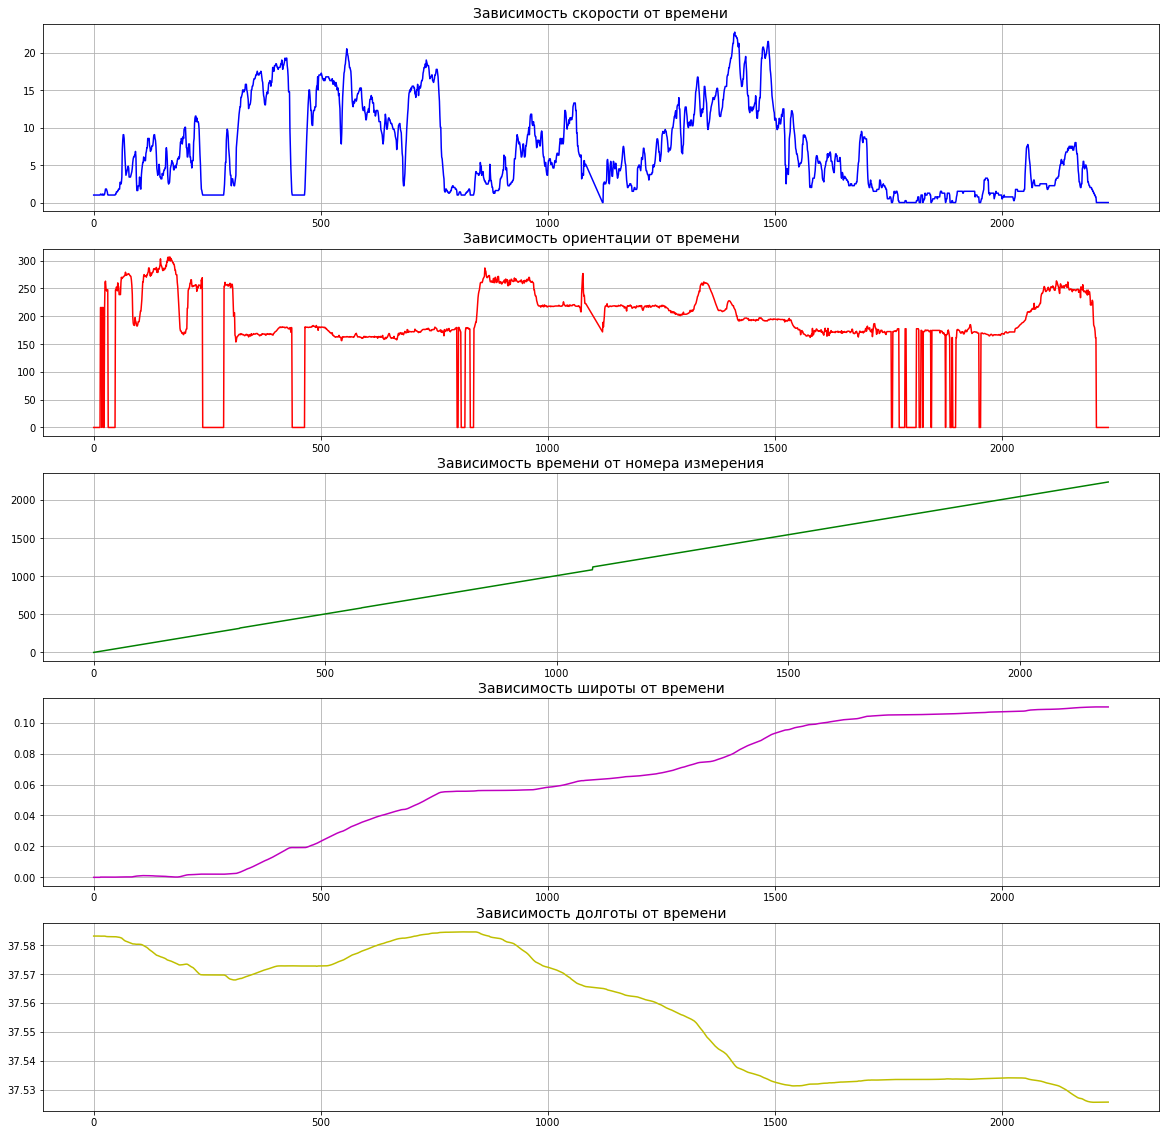

In [161]:
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.subplot(511)
plt.plot(time, speed, 'b')
# plt.plot(np.linspace(0, len(time)-1, len(time)), speed, 'b')
plt.title("Зависимость скорости от времени", fontsize = 14)
plt.grid()

plt.subplot(512)
# plt.plot(time[:20], bearing[:20], 'r')
plt.plot(time, bearing, 'r')
# plt.plot(np.linspace(0, len(time)-1, len(time)), speed, 'b')
plt.title("Зависимость ориентации от времени", fontsize = 14)
plt.grid()

plt.subplot(513)
plt.plot(np.linspace(0, len(time)-1, len(time)), time, 'g')
plt.title("Зависимость времени от номера измерения", fontsize = 14)
plt.grid()

plt.subplot(514)
# plt.plot(time[:20], latitude[:20], 'm')
plt.plot(time, latitude, 'm')
plt.title("Зависимость широты от времени", fontsize = 14)
plt.grid()

plt.subplot(515)
plt.plot(time, longitude, 'y')
plt.title("Зависимость долготы от времени", fontsize = 14)
plt.grid()